In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('E:\Factelytics Case Study\Train data.csv')
data = data.drop(['days_since_prev_campaign_contact'],axis=1)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(29948, 17)
['id', 'customer_age', 'job_type', 'marital', 'education', 'default', 'balance', 'housing_loan', 'personal_loan', 'communication_type', 'day_of_month', 'month', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'prev_campaign_outcome', 'term_deposit_subscribed']


In [3]:
data.isnull().sum()

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [4]:
data['term_deposit_subscribed'].value_counts()

0    26720
1     3228
Name: term_deposit_subscribed, dtype: int64

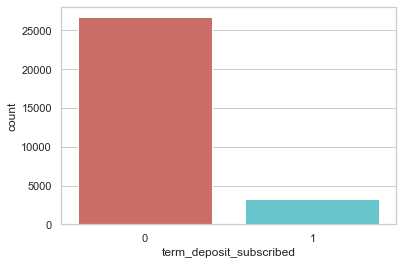

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x='term_deposit_subscribed',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [6]:
count_no_sub = len(data[data['term_deposit_subscribed']==0])
count_sub = len(data[data['term_deposit_subscribed']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 89.22131694937893
percentage of subscription 10.778683050621076


In [7]:
data.groupby('term_deposit_subscribed').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
term_deposit_subscribed,,,,,,
0,40.323990,1308.555988,15.899588,219.390644,2.852470,0.512388
1,41.399318,1839.493185,15.220260,565.115861,2.127633,1.236059


In [8]:
data.groupby('job_type').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
job_type,,,,,,,
admin.,38.726636,1098.873248,15.558411,242.655958,2.579439,0.712617,0.104556
blue-collar,39.569654,1084.252834,15.450225,263.444013,2.804317,0.504116,0.066936
entrepreneur,41.895769,1581.753354,15.726522,256.039216,2.880289,0.441692,0.075335
housemaid,45.935791,1424.598098,16.193817,240.645660,2.802616,0.422117,0.084423
management,40.017979,1788.350517,16.161018,248.603023,2.874463,0.669372,0.126492
retired,61.057487,2002.237299,15.350936,282.737299,2.389037,0.658422,0.217246
self-employed,39.809701,1686.499067,16.288246,276.659515,2.878731,0.555970,0.119403
services,38.257205,1003.942723,15.565202,258.874640,2.743876,0.518732,0.081052
student,25.941176,1416.465819,15.298887,242.780604,2.286169,1.001590,0.271860


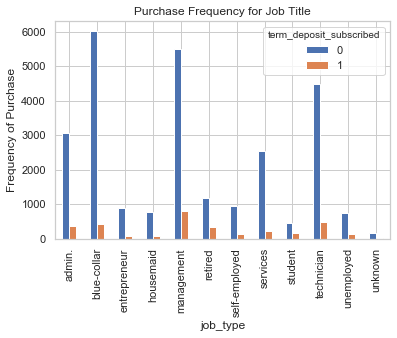

In [9]:
%matplotlib inline
pd.crosstab(data.job_type,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('job_type')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_vs_job')

In [10]:
data.groupby('marital').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
marital,,,,,,,
divorced,45.472428,1236.347356,15.690733,262.725128,2.639284,0.530415,0.107732
married,42.837614,1432.186124,15.900434,252.377363,2.851345,0.574772,0.093396
single,33.233712,1278.235726,15.725065,263.241057,2.666548,0.648661,0.138474


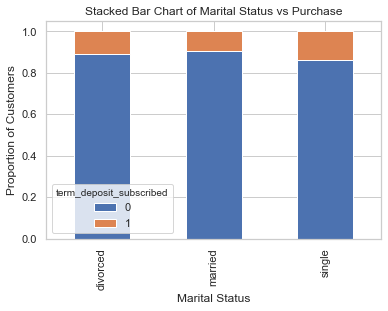

In [11]:
table=pd.crosstab(data.marital,data.term_deposit_subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_purchase')

In [12]:
data.groupby('education').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
education,,,,,,,
primary,45.197749,1260.646215,15.371662,255.866696,2.828735,0.499890,0.081660
secondary,39.502144,1154.035018,15.823350,256.910733,2.709265,0.579197,0.095699
tertiary,39.103378,1767.514273,16.079836,256.593540,2.852951,0.674059,0.139543
unknown,44.196429,1530.724026,15.727273,256.804383,2.826299,0.465909,0.128247


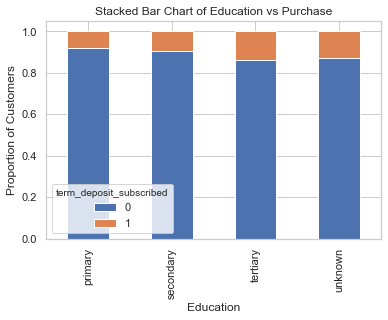

In [13]:
table=pd.crosstab(data.education,data.term_deposit_subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_purchase')

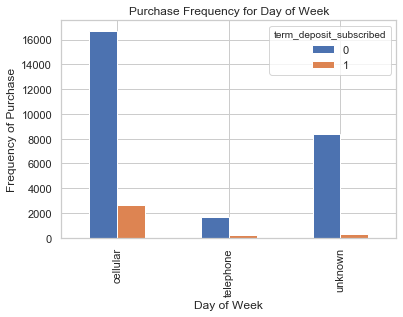

In [14]:
pd.crosstab(data.communication_type,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('Communication_vs_purchase')

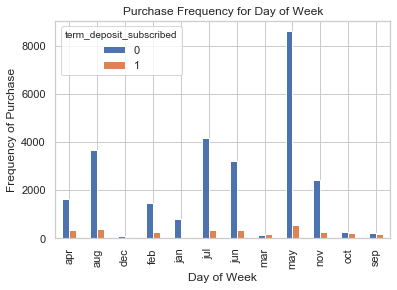

In [15]:
pd.crosstab(data.month,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('month_vs_purchase')

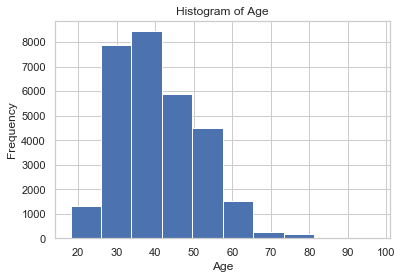

In [16]:
data.customer_age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

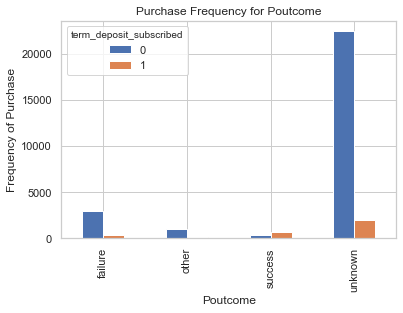

In [17]:
pd.crosstab(data.prev_campaign_outcome,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

# Dummy Variables

In [18]:
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=data[to_keep]
data_final.columns.values

array(['id', 'customer_age', 'balance', 'day_of_month',
       'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'term_deposit_subscribed',
       'job_type_admin.', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'job_type_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes',
       'housing_loan_no', 'housing_loan_yes', 'personal_loan_no',
       'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'communication_type_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_

In [20]:
data_final = data_final.drop(['id'],axis=1)

In [21]:
X = data_final.loc[:, data_final.columns != 'term_deposit_subscribed']
y = data_final.loc[:, data_final.columns == 'term_deposit_subscribed']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['term_deposit_subscribed'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['term_deposit_subscribed']==0]))
print("Number of subscription",len(os_data_y[os_data_y['term_deposit_subscribed']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['term_deposit_subscribed']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['term_deposit_subscribed']==1])/len(os_data_X))

length of oversampled data is  37378
Number of no subscription in oversampled data 18689
Number of subscription 18689
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [22]:
data_final_vars=data_final.columns.values.tolist()
y=['term_deposit_subscribed']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\V. Patton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\V. Patton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\V. Patton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

C:\Users\V. Patton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\V. Patton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

[False False False False False False  True  True  True  True False False
  True  True False  True False  True  True  True  True  True  True  True
  True False False  True  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False]
[27 31 28 29 25 26  1  1  1  1  2  5  1  1  4  1  3  1  1  1  1  1  1  1
  1 13 12  1  1 10  9  1  1  1 20 15 22 18 14 17 21 24 19 16 23 30  7  8
 11  6]


In [23]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True  True  True False False
  True  True False  True False  True  True  True  True  True  True  True
  True False False  True  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False]
[27 31 28 29 25 26  1  1  1  1  2  5  1  1  4  1  3  1  1  1  1  1  1  1
  1 13 12  1  1 10  9  1  1  1 20 15 22 18 14 17 21 24 19 16 23 30  7  8
 11  6]


In [24]:
data_final = data_final.drop(['balance'],axis=1)

In [25]:
ranking = pd.DataFrame(rfe.support_,index=data_final.columns,columns=['Rank'])
ranking

,Rank
customer_age,False
day_of_month,False
last_contact_duration,False
num_contacts_in_campaign,False
num_contacts_prev_campaign,False
term_deposit_subscribed,False
job_type_admin.,True
job_type_blue-collar,True
job_type_entrepreneur,True
job_type_housemaid,True


In [26]:
cols=['job_type_entrepreneur', 'marital_divorced', 'marital_single','marital_married', 'education_primary','education_secondary',
      'education_tertiary', 'education_unknown','housing_loan_no','personal_loan_no','personal_loan_yes',
      'communication_type_unknown', 'month_apr', 'month_feb', 'month_jan', 'month_may', 'month_nov',
      "prev_campaign_outcome_failure", "prev_campaign_outcome_other"] 
X=os_data_X[cols]
y=os_data_y['term_deposit_subscribed']

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.443929
         Iterations 7
                                Results: Logit
Model:                Logit                     Pseudo R-squared:   0.360     
Dependent Variable:   term_deposit_subscribed   AIC:                33224.3568
Date:                 2021-04-05 23:33          BIC:                33386.4048
No. Observations:     37378                     Log-Likelihood:     -16593.   
Df Model:             18                        LL-Null:            -25908.   
Df Residuals:         37359                     LLR p-value:        0.0000    
Converged:            1.0000                    Scale:              1.0000    
No. Iterations:       7.0000                                                  
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5548   48]
 [1366 4252]]


In [37]:
pd.DataFrame(y_test)

,term_deposit_subscribed
30421,1
6109,1
25344,1
2702,0
7584,0
...,...
5806,0
17189,0
9660,0
24002,1


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5596
           1       0.99      0.76      0.86      5618

    accuracy                           0.87     11214
   macro avg       0.90      0.87      0.87     11214
weighted avg       0.90      0.87      0.87     11214



In [32]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()